start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------
start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------
start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------


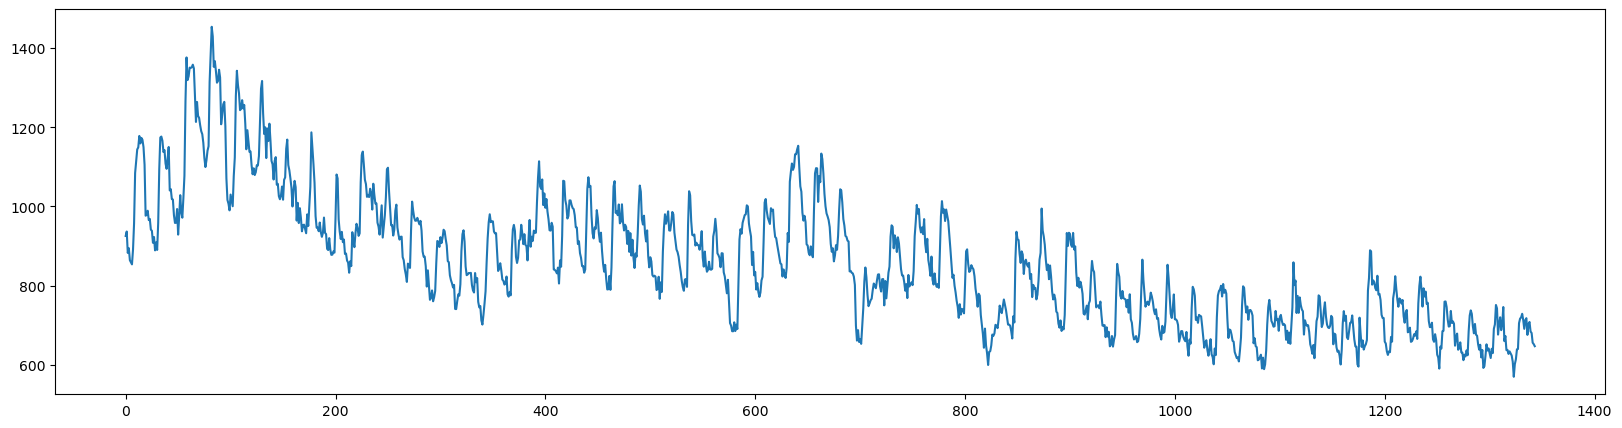

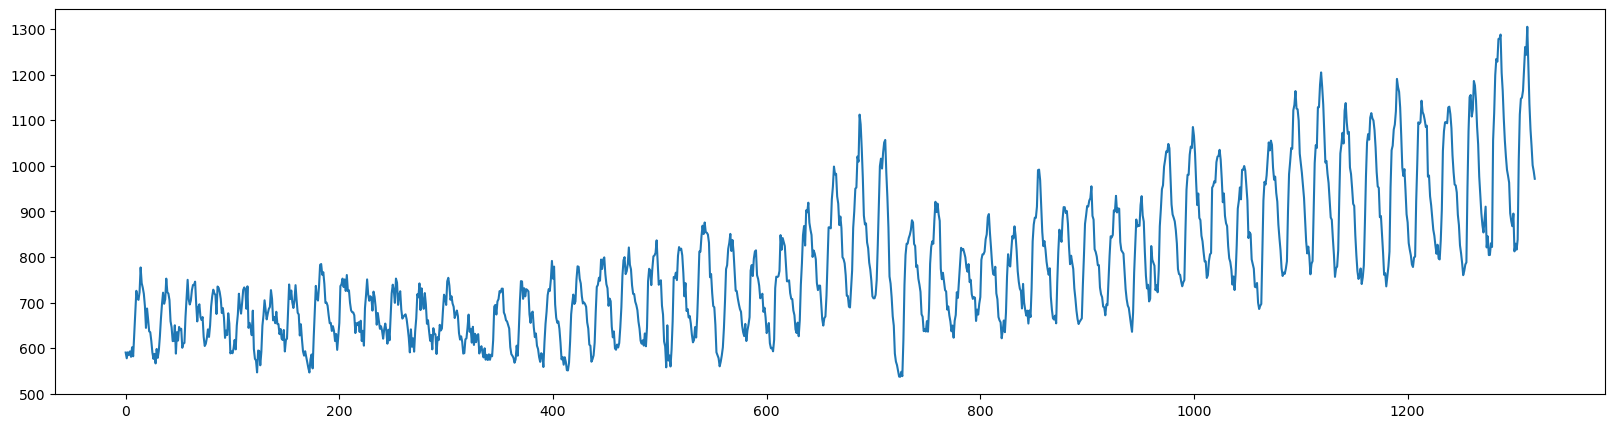

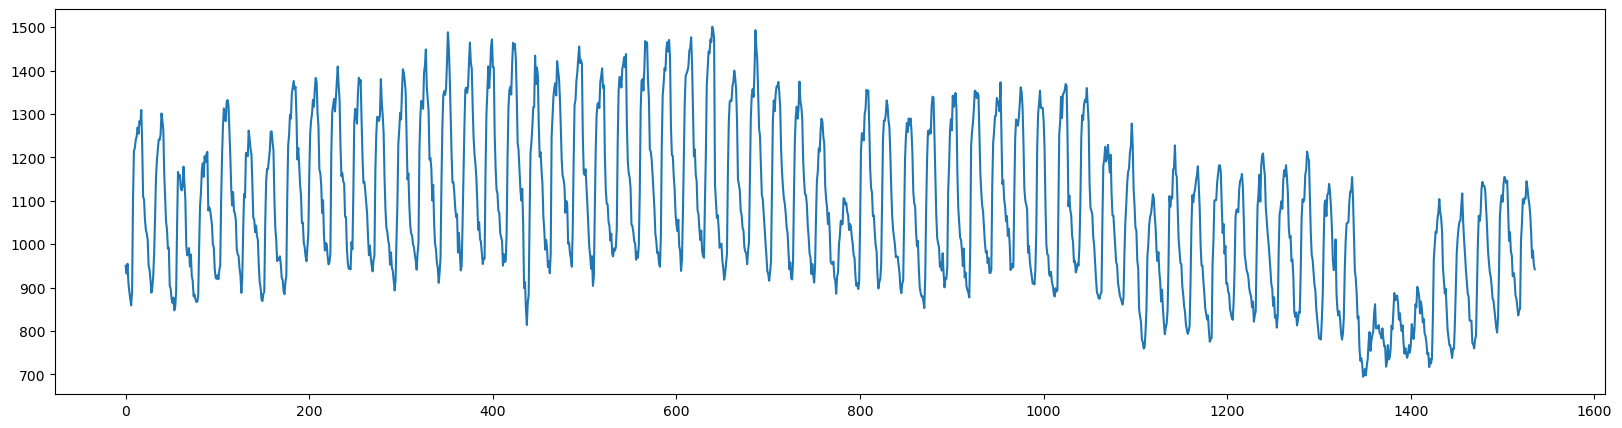

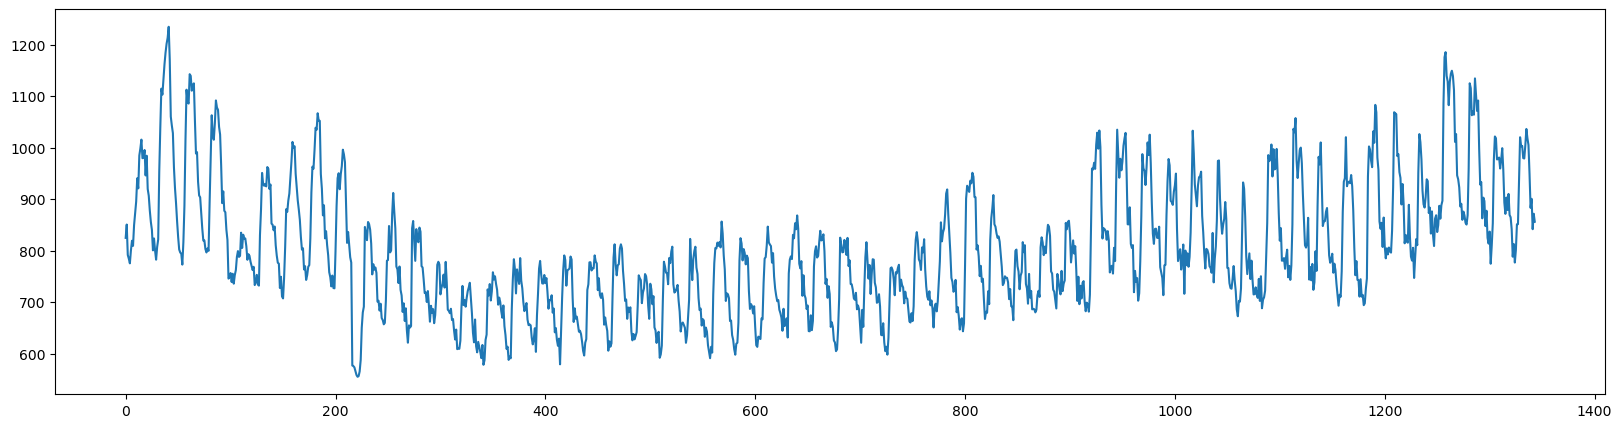

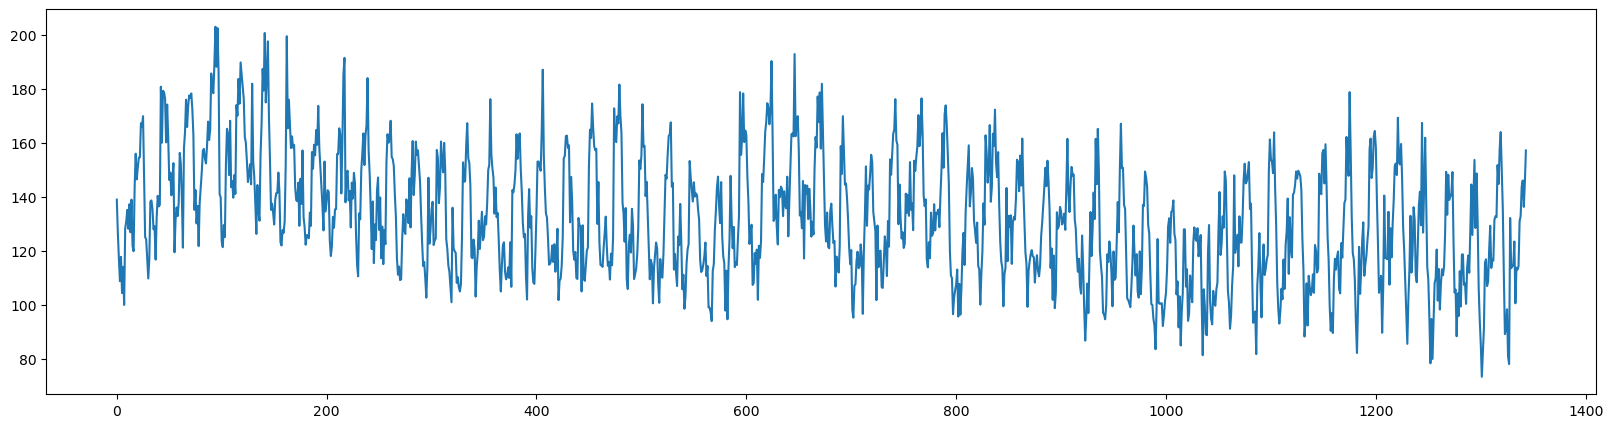

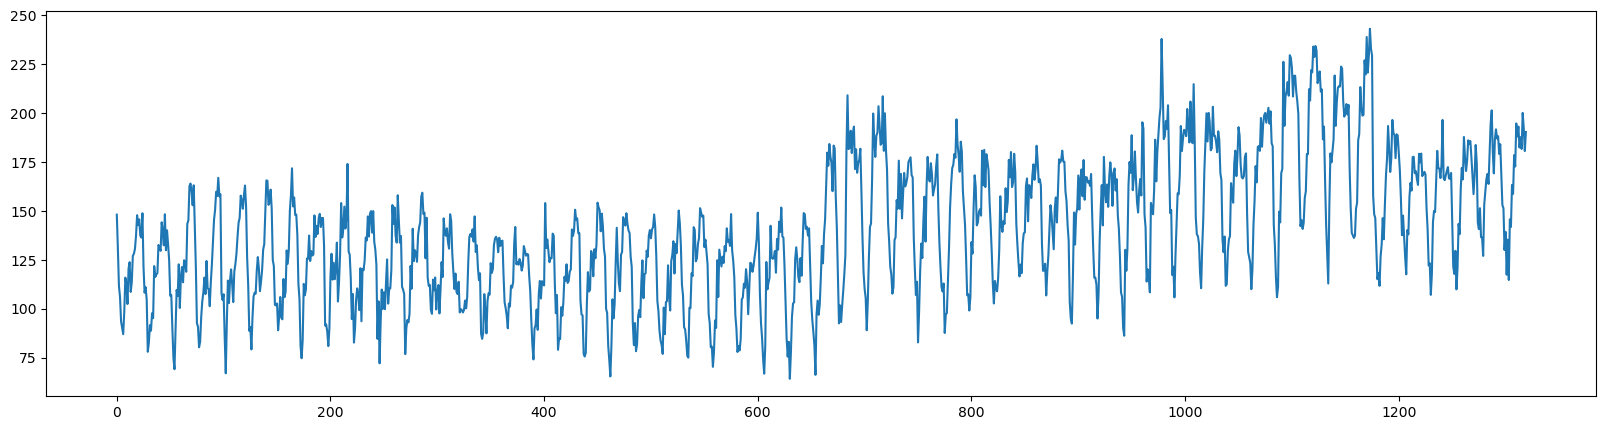

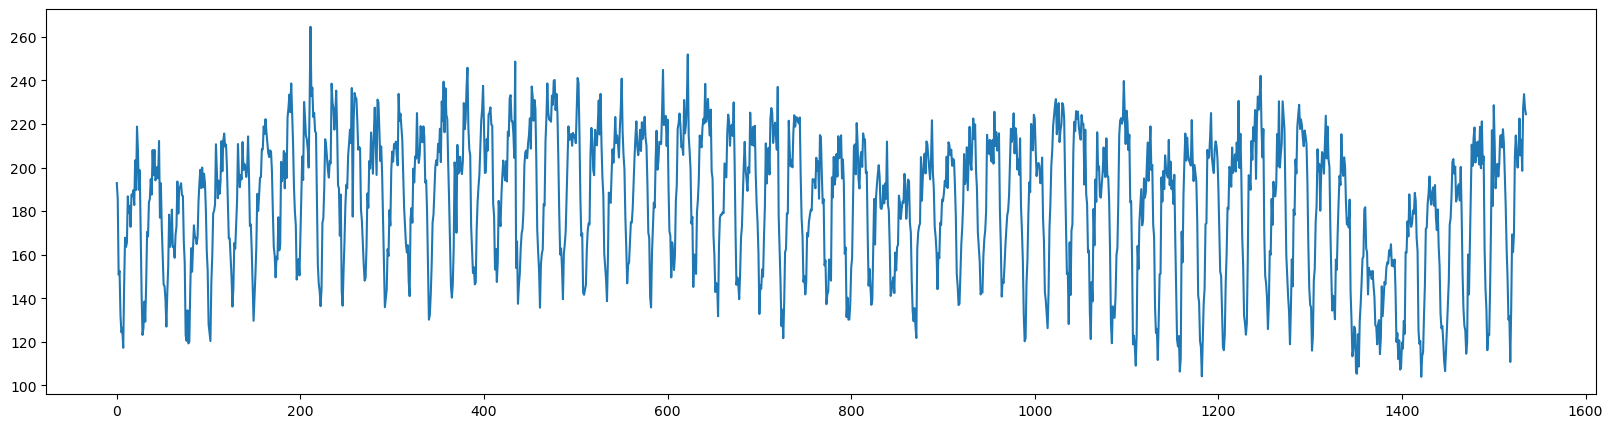

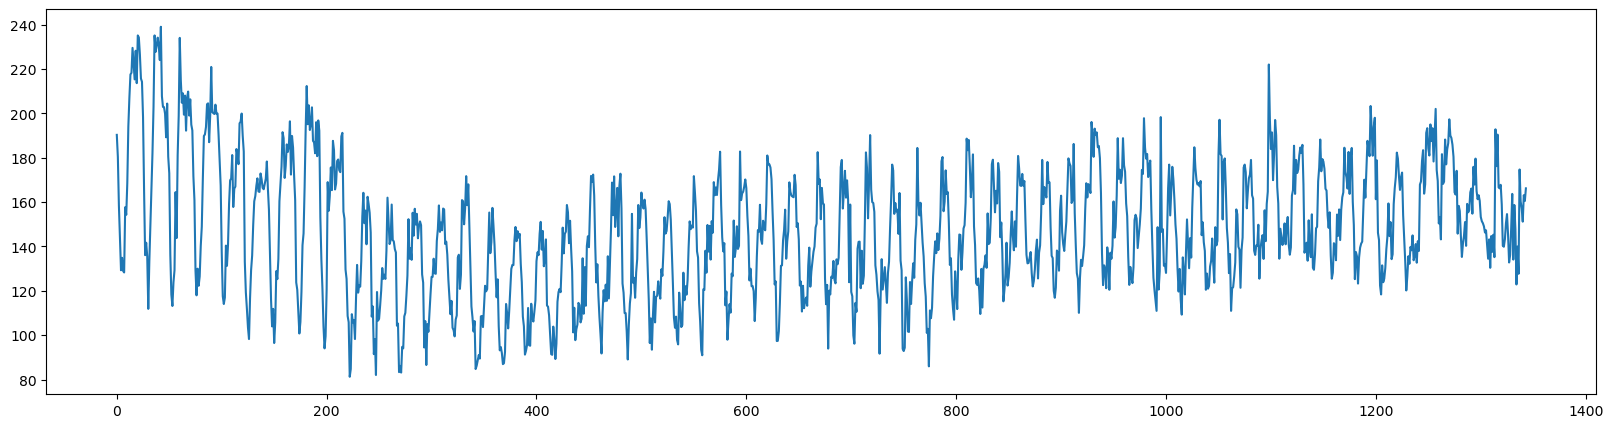

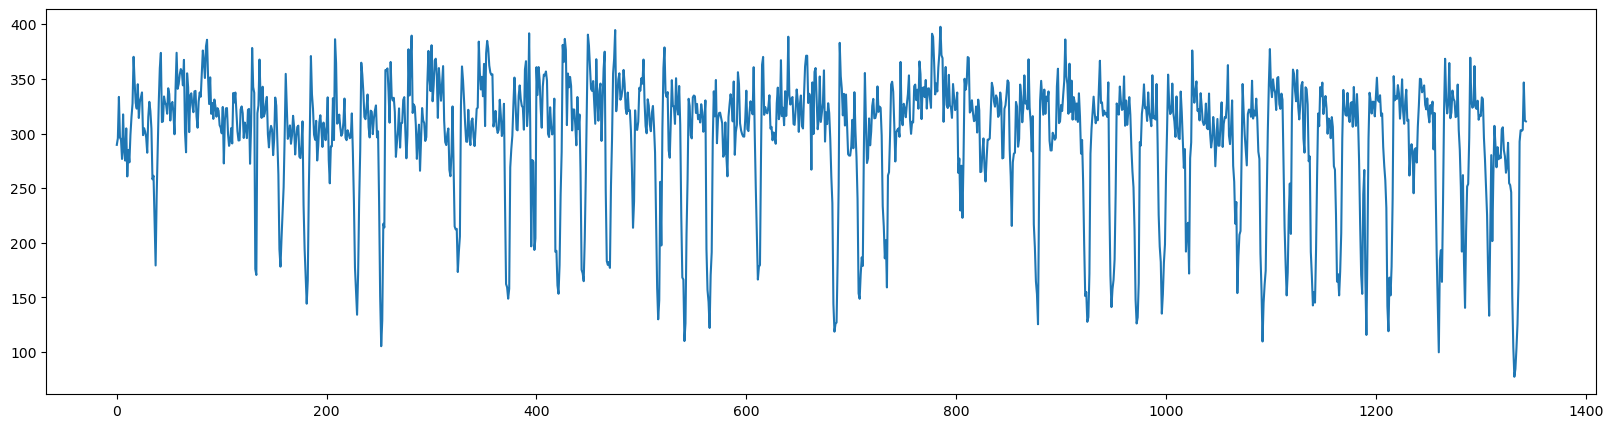

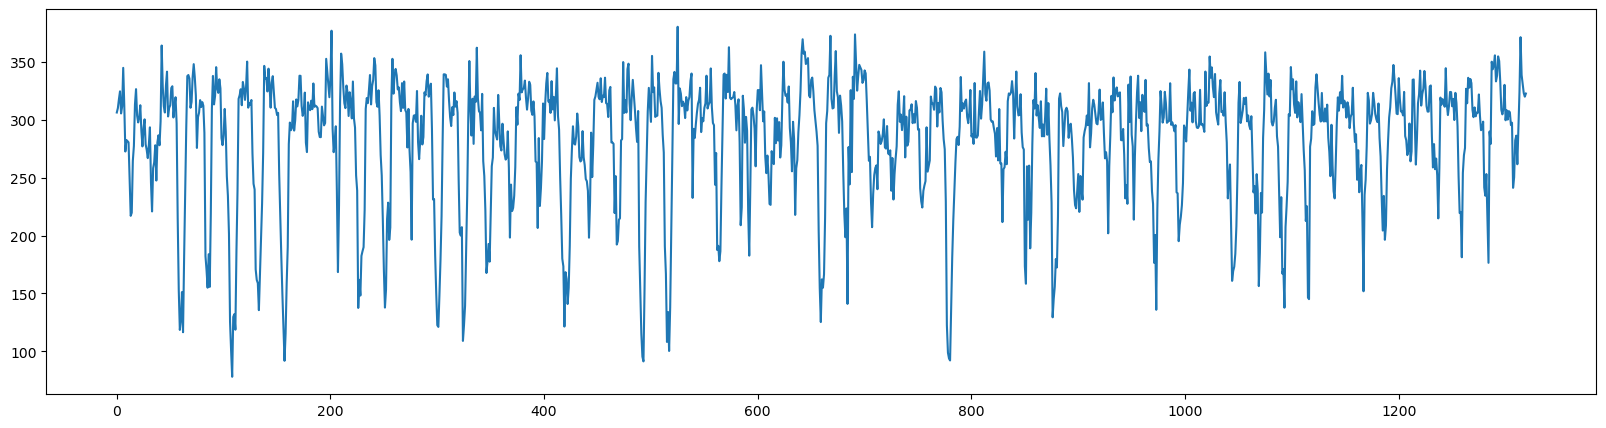

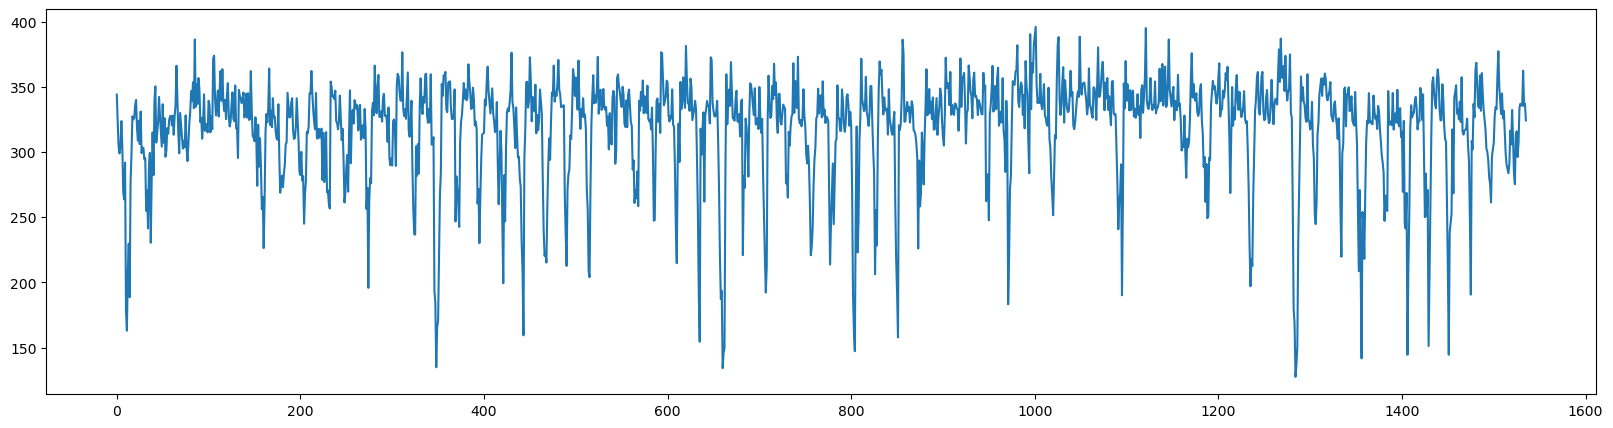

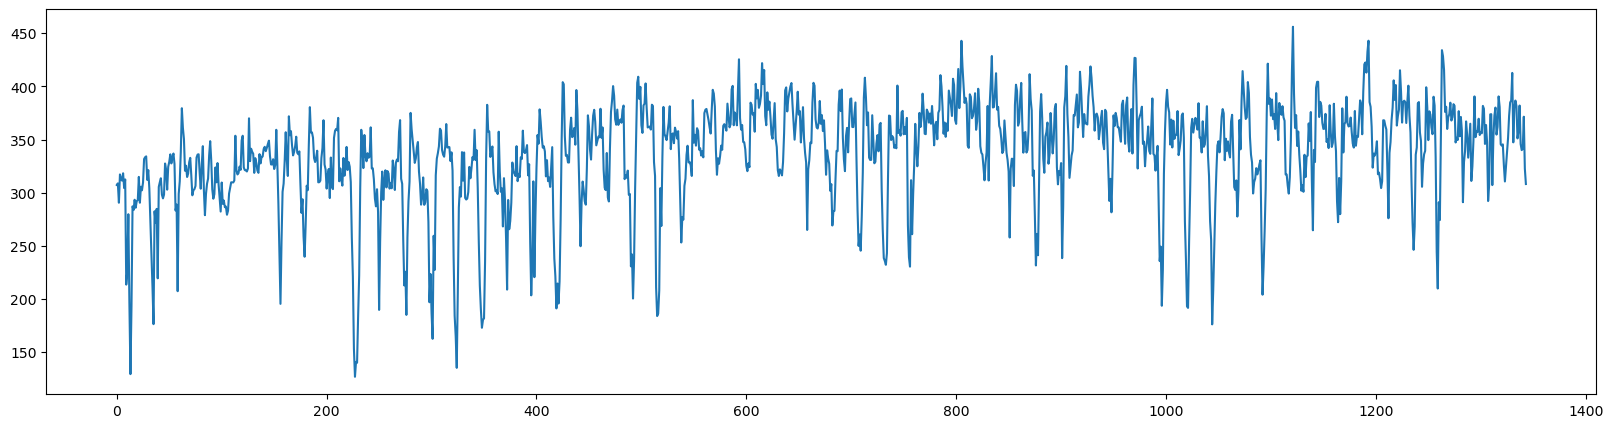

In [1]:
def get_label_interval(X):
    label_interval = []
    for i in range(1, 13):
        cnt = 0
        for idx in X.index:
            if '21{0:0>2}'.format(i) in str(idx):
                cnt+=1
        label_interval.append(cnt)
    return label_interval


def plot(interval, i, data, f):
    start = sum(interval[0:i])
    end = sum(interval[0:i+3])
    days = sum(interval[i:i+3])
    print(f'start: {start}, end: {end}, days: {days}, start*24: {start*24}, end*24: {end*24}')
    
    fig = plt.figure(figsize=(20, 5))
    plt.plot(data[start*24:end*24])
    
    s = np.mean((data[start*24:end*24]))
    # calculate the mean of the data which is bigger than 0
    m = np.mean(data[start*24:end*24][data[start*24:end*24] > 0])
    
    # print(f'{i+1}~{i+3} month: {round(s,4)}   |   {round(m,4)}', file = f)
    print(f'{i+1}~{i+3} month: {round(s,4)}', file = f)


def check(building):
    load = pd.read_csv(f'./processed_data/load/Y_load_231days_{building}.csv', index_col=0)
    
    pv = pd.read_csv(f'./processed_data/pv/Y_pv_231days_{building}.csv', index_col = 0)
    pv = pv.iloc[:, 0:24]

    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0 )
    
    l = len(load)

    # for i in range(l):
    #     pv_row = pv.iloc[i]
    #     netload_row = net_load.iloc[i]
    #     load_row = load.iloc[i]
    #     for j in range(24):
    #         if pv_row[j] < 0:
    #             pv_row[j] = 0
    #         if int(load_row[j]) != int(pv_row[j] + netload_row[j]):
    #             print(f'idx: {i},     j: {j},    X_row: {load_row[j]},     pv: {pv_row[j]},     netload: {netload_row[j]},    pv+netload: {pv_row[j] + netload_row[j]}')
    
    
    interval = get_label_interval(load)
    load = load.values.reshape(-1)
    pv = pv.values.reshape(-1)
    netload = net_load.values.reshape(-1)
    
    data = netload
    data_ = 'netload'
    f = open(f'./experiment_outputs/mean_of_data.txt', 'a')
    print(f'{building}\n', file = f)
    print(f'Mean of {data_}', file = f)
    plot(interval, 0, data, f)
    plot(interval, 3, data, f)
    plot(interval, 6, data, f)
    plot(interval, 9, data, f)
    print('-'*80)
    # print(f'Mean of the total {data_}: {round(np.mean(data),4)}   |   {round(np.mean(data[data > 0]), 4)}', file = f)
    print(f'Mean of the total {data_}: {round(np.mean(data),4)}', file = f)
    print('-'*80, file = f)
    f.close()
    
    

        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


check('RISE')
check('DORM')
check('MACH')

    

In [77]:
3.1954/20.5389

0.15557795208117278